In [1]:
import pandas as pd
import matplotlib

df = pd.read_csv("srimulat.csv",sep='\t', header=0, names=['sent_time','user','content'])
df = df.astype({'sent_time': 'datetime64', 'user': 'object', 'content': 'object'})
df.set_index('sent_time'); # use semicolon to suppress output

In [64]:
# Age Of Group
from dateutil.relativedelta import relativedelta
delta = relativedelta(df['sent_time'].max(), df['sent_time'].min())
print("Ages of this group: {} year {} month {} day".format(delta.years, delta.months, delta.days))

Ages of this group: 0 year 3 month 28 day


In [65]:
# How many conversations ?
print(df['sent_time'].count())

2380


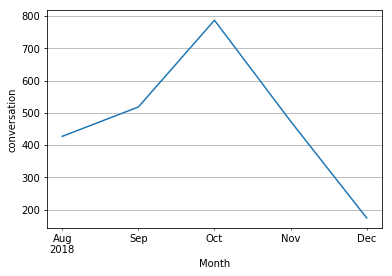

In [82]:
# Busiest Month
busiest = df['sent_time'].groupby(df['sent_time'].dt.to_period("M").rename('Month')).agg('count').plot(grid=True)
busiest.set_ylabel("conversation");

Text(0, 0.5, 'conversation')

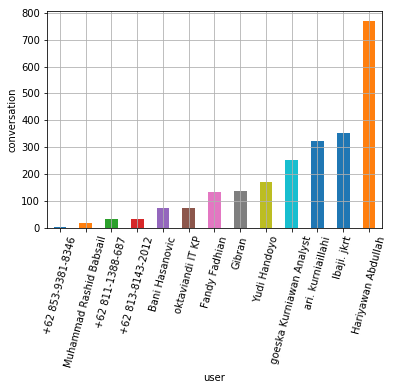

In [81]:
# Conversation group by user
conversation = df['user'].groupby(df['user']) \
                .agg('count') \
                .reset_index(name='count') \
                .sort_values(['count'], ascending=True)

conversation.columns = ['user','total']

conversation[conversation>1] \
    .dropna() \
    .plot(x='user',y='total',kind='bar',legend=False,rot=75, grid=True) \
    .set_ylabel("conversation")

In [171]:
# Total post by user per year per month
df.groupby([
            df['sent_time'].dt.year.rename('year'), 
            df['sent_time'].dt.month.rename('month'), 
            df['user']]).size()

